In [72]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# SAT problem: generating a random formula

$$F = (x_1\lor
x_2 \lor \lnot x_3) \land (x_1\lor\lnot x_2 \lor x_3) \land (x_2\lor
x_3 \lor x_4)\land (x_4\lor x_5 \lor \lnot x_6).$$ 

In [73]:
n = 6
m = 4
f = array([[1,2,-3],[1,-2,3],[2,3,4],[4,5,-6]])
print(f)
x = array([1,1,1,0,0,1])
print(x)

[[ 1  2 -3]
 [ 1 -2  3]
 [ 2  3  4]
 [ 4  5 -6]]
[1 1 1 0 0 1]


eval: first-1 clause that is not satisfied by the instance $x$ (returns $m$ if the formula is satisfied)

In [74]:
def eval(form, x, n, m):
    j = 0
    p = 1
    while j < m and p > 0:
        p=0
        for k in range(3):
            if form[j,k] > 0:
                p = p + x[form[j,k]-1]
            else:
                p = p + (1-x[-form[j,k]-1])
        j += 1
    if p == 0:
        return j-1
    else:
        return j

In [76]:
print(eval(f, x, 6, 4))

3


In [5]:
def rand_form(n, m):
    form = np.zeros((m, 3), int)
    for j in range(m):
        for k in range(3):
            form[j, k] = randint(n) + 1
            if randint(2):
                form[j, k] = -form[j, k]
    return form

# Checking satisfiability algorithms

## Monte-Carlo algorithm

Monte-Carlo Algorithm
- Generates a random instance
- returns ```true``` is the instance satisfies the formula and ```false``` otherwise

In order to minimize the error probability, we generate up to $t_{\max}$ random instances.

In [6]:
def mc(form, n, m, tmax):
    k = 0
    r = 0
    x = randint(2, size = n)
    while r < m and k < tmax:
        x=randint(2,size = n)
        r=eval(form, x ,n, m)
        k+=1
    return k-1

## Constructive Local Lovász Lemma approach

- Generates a random instance
- while the formula is not satisfied, 
    - let $j$ an unsatisfied clause
    - generate independently the variables of that clause
    
As we apply this algorithm outside the hypotheses of LLL, we stop after $t_{\max}$ attempts

In [7]:
def lll(form,n,m,tmax):
    k=0
    x=randint(2,size=n)
    r=eval(form,x,n,m)
    while r<m and k<tmax:
        k+=1
        for l in range(3):
            i = max(form[r,l],-form[r,l])-1
            x[i] = randint(2)
        r = eval(form,x,n,m)
    return k

## Comparison of the performances of the two algorithms

In [10]:
n=20
mmax = 100

nbf = 50

tmax = 1000

alpha = arange(mmax)
mc_tab = zeros(mmax)
lll_tab = zeros(mmax)

m=1
while m<mmax:
    for i in range(nbf):
        f = rand_form(n,m+1)
        mc_tab[m]+=mc(f,n,m,tmax)
        lll_tab[m]+=lll(f,n,m,tmax)
    mc_tab[m] = mc_tab[m]/nbf
    lll_tab[m] = lll_tab[m]/nbf
    m+=1
    

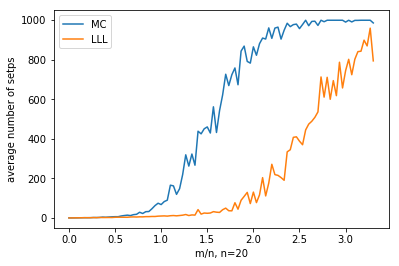

In [69]:
xlabel('m/n, n=20')
ylabel('average number of setps')
plot(alpha/n,mc_tab, label = 'MC')
plot(alpha/n,lll_tab, label = 'LLL')   
plt.legend()
show()

# A threshold function for satisfiability

In [37]:
nbf = 50

n=10

mmax = 75

tmax = 1000

alpha10 = arange(mmax)
sat10_tab = zeros(mmax)

m=0
while m<mmax:
    for i in range(nbf):
        f = rand_form(n,m+1)
        if lll(f,n,m,tmax) < tmax:
            sat10_tab[m]+=1
    m+=1
    

    

In [38]:
n=20

mmax = 150

tmax = 1000


alpha20 = arange(mmax)
sat20_tab = zeros(mmax)

m=0
while m<mmax:
    for i in range(nbf):
        f = rand_form(n,m+1)
        if lll(f,n,m,tmax) < tmax:
            sat20_tab[m]+=1
    m+=1
    

In [39]:
n=30

mmax = 225

tmax = 1000

alpha30 = arange(mmax)
sat30_tab = zeros(mmax)

m=0
while m<mmax:
    for i in range(nbf):
        f = rand_form(n,m+1)
        if lll(f,n,m,tmax) < tmax:
            sat30_tab[m]+=1
    m+=1
    

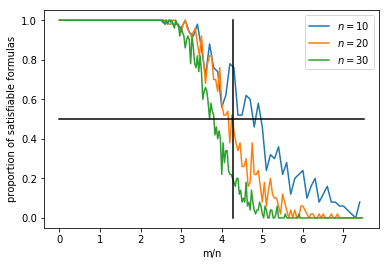

In [64]:
plot(alpha10/10,sat10_tab/nbf, label=r'$n=10$')
plot(alpha20/20,sat20_tab/nbf, label=r'$n=20$')
plot(alpha30/30,sat30_tab/nbf, label=r'$n=30$')
xlabel('m/n')
ylabel('proportion of satisfiable formulas')
plt.plot((4.27, 4.27), (0, 1), 'k-')
plt.plot((0, 7.5), (0.5, 0.5), 'k-')
plt.legend()
show()

## Exercise: An easy upper bound for the threshold

We consider the following model for the 3-SAT problem: 
- $\mathcal{F}_{n,m}$ is the probabilistic space of 3-SAT formulas with $n$ variables and where $m$ clauses are generated uniformly and independently;
- we denote $F_{n,m}$ a random formula in $\mathcal{F}_{n,m}$;
- we let $n$ and $m$ grow to infinity with a fixed ratio $r$: $m=nr$.

The goal is to determine a ratio $\alpha$ such that for all $r>\alpha$, $\mathbf{P}(F_{n,rn} \text{ is satisfiable }) \overset{n\to\infty}\longrightarrow 0$.

**Question 1:** Fix an affectation $A$ of the variables. What is the probability that $A$ satisfies $F_{n,m}$?

**Solution: ** Let $C$ be a random clause. It is satisfied with probability $7/8$: three variables are choseen at random and their sign is also chosen at random. 
As the $m$ clauses are chosen independently, the probability that they are all satisfied is $(7/8)^m$. 

** Question 2:** Deduce an upper bound for $F_{n,m}$ to be satisfiable.

**Solution: ** $F_{n,m}$ is satisfiable if and only if there exists one assignment that satisfies it. 
We use the union bound:
    $$\mathbf{P}(F_{n,m} \text{ satisfiable}) \leq \sum_{A \text{ affectation}} \mathbf{P}(A \text{ satisfies }F_{n,m})  = 2^n (7/8)^m.$$

** Question 3:** Deduce an upper bound for $\alpha$.

** Solution: ** We need that $\mathbf{P}(F_{n,rn} \text{ satisfiable})\overset{n\to\infty}\longrightarrow 0$. It the suffices that $2(7/8)^r<1$, which is equivalent to 
$r>\frac{\ln 2}{\ln{8/7}} = \frac{1}{3-log_2 7}$. 
This gives $r = 5.2$

